Penjelasan Kustomisasi ada pada Note Js Multi Line Chart

Analisis Behavior transaksi di DKI Jakarta pada bulan Oktober-Desember 2019 - Analisis Data untuk Melihat Perbandingan kategorikal - Melakukan Perbandingan GMV tiap kota
1. Membuat Subset Data : Filtering Data dan disimpan ke dataframe baru
2. Membuat Pie Chart
3. Membuat Bar Chart
4. Membuat Multi Bar Chart
5. Membuat Stacked Chart
6. Hasil Temuan

In [1]:
# Membuat Subset Data : Filtering Data dan disimpan ke dataframe baru 
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]
print(dataset_dki_q4.head())

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   
6   1711399  2019-11-04        16791    Jakarta Barat  DKI Jakarta      P0860   

     brand  quantity  item_price order_month      gmv  
0  BRAND_J        10      740000     2019-10  7400000  
1  BRAND_R         2      604000     2019-10  1208000  
2  BRAND_C         8     1045000     2019-11  8360000  
4  BRAND_R         2     4475000     2019-10  8950000  
6  BRAND_C         1     1465000     2019-11  1465000  


Membuat Pie Chart
1. Fungsi : membandingkan GMV tiap kota
1. Kita perlu membuat dulu dataframe agregat - Misalnya gmv_per_city_dki_q4, masukkan datanya ke function plt.pie()
2. Beberapa parameter yang bisa dimodifikasi:
3. labels: array yang berisikan label/tulisan yang ditunjukkan untuk masing-masing bagian pie.
4. colors: array yang berisikan warna untuk masing-masing bagian pie.
5. autopct: format untuk nilai persentase yang ditampilkan, bisa berupa string atau function.
6. shadow: jika diisi True, maka ada bayangan untuk pie chart-nya. Default-nya adalah False.
7. radius: jari-jari dari pie-chart.

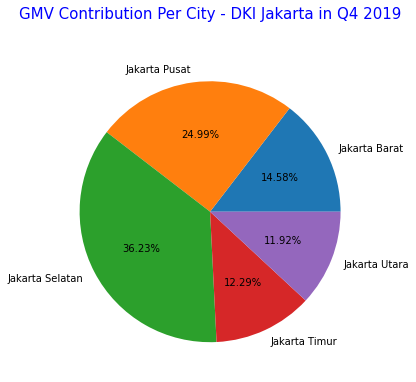

In [2]:
# Membuat Pie Chart
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

gmv_per_city_dki_q4 = dataset_dki_q4.groupby('city')['gmv'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_per_city_dki_q4['gmv'], labels = gmv_per_city_dki_q4['city'],autopct='%1.2f%%')
plt.title('GMV Contribution Per City - DKI Jakarta in Q4 2019', loc='center',pad=30, fontsize=15, color='blue')
plt.show()

Membuat Bar Chart
1. Fungsi : Alternatif lain untuk membandingkan GMV tiap kota adalah dengan barchart. Saya lebih menyukai visualisasi ini karena lebih mudah terlihat perbandingan antar kota.
2. Tambahkan parameter kind='bar'
3. Perhatikan di sini juga ditambahkan parameter rotation di plt.xtick() untuk memutar label di sumbu-x
4. jika ingin barchart-nya horizontal, maka bisa mengganti parameternya menjadi kind='barh', dengan tentu saja tidak lupa juga harus menyesuaikan sumbu x dan y-nya.

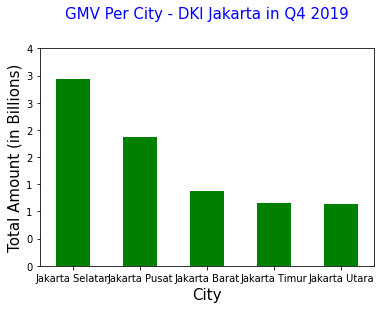

In [3]:
# Membuat Bar Chart
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

plt.clf()
dataset_dki_q4.groupby('city')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('GMV Per City - DKI Jakarta in Q4 2019', loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('City', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.show()

Membuat Multi-Bar Chart
1. Fungsi : kelihatannya Jakarta Selatan dan Jakarta Pusat lumayan mendominasi GMV. Tapi apakah ini konsisten di setiap bulan? Bisa tolong tampilkan?
2. aku buatkan dulu multi-barchart untuk analisisnya

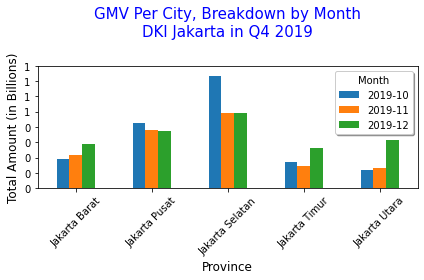

In [4]:
# Membuat Multi-Bar Chart
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

dataset_dki_q4.groupby(['city','order_month'])['gmv'].sum().unstack().plot(kind='bar')
plt.title('GMV Per City, Breakdown by Month\nDKI Jakarta in Q4 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Province', fontsize = 12)
plt.ylabel('Total Amount (in Billions)',fontsize = 12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, title='Month')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Membuat Stacked Chart
1. Fungsi : Sebagai Pembanding & Memperjelas Hasil Multi Bar Chart

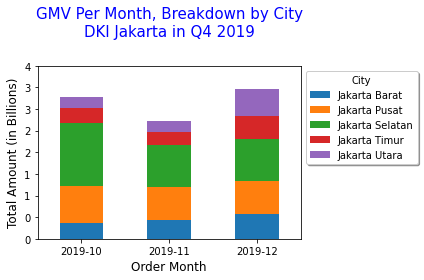

In [5]:
# Membuat Stacked Chart
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

dataset_dki_q4.groupby(['order_month','city'])['gmv'].sum().sort_values(ascending=False).unstack().plot(kind='bar', stacked=True)
plt.title('GMV Per Month, Breakdown by City\nDKI Jakarta in Q4 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Order Month', fontsize = 12)
plt.ylabel('Total Amount (in Billions)',fontsize = 12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, ncol=1,title='City')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Hasil Temuan : Multi Bar & Stacked Chart
1. Dari kedua chart tersebut, kita sama-sama bisa melihat pola bahwa kebanyakan GMV turun dari bulan Oktober ke November, tetapi lalu naik pesat di bulan Desember. Untuk di Jakarta Barat, GMV November justru naik dari Oktober. Sedangkan di Jakarta Selatan, GMV Desember justru lebih kecil daripada GMV Oktober
2. Hmm, padahal Jakarta Selatan adalah penyumbang GMV paling besar ya. Berarti kita harus menyarankan tim bisnis untuk genjot lagi penjualan di sana, agar trend-nya naik kembali, seperti kota-kota lainnya.